# Obtendo dados de ações de mercado

## Biblitecas necessárias

In [20]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import plotly.offline as pyo

In [3]:
plt.style.use('seaborn')

## Desenvolvimento

### Definição do intervalo de tempo para análise

In [6]:
end = dt.datetime(2021, 4, 13)
start = dt.datetime(2000,1,1)
start, end

(datetime.datetime(2000, 1, 1, 0, 0), datetime.datetime(2021, 4, 13, 0, 0))

### Seleção dos *tickers*/ações para análise

In [8]:
stocklist = ['CBA', 'NAB', 'WBC', 'ANZ']
stocks = [_ + '.AX' for _ in stocklist] 

### Obtenção dos dados

In [9]:
df = pdr.get_data_yahoo(stocks, start, end)

In [10]:
df.head()

Attributes Adj Close                      ...     Volume                      
Symbols       CBA.AX    NAB.AX    WBC.AX  ...     NAB.AX     WBC.AX     ANZ.AX
Date                                      ...                                 
2000-01-02  7.993308  6.265028  3.351789  ...        0.0        0.0        0.0
2000-01-03  7.901886  6.049917  3.288944  ...  3005390.0  2324971.0  3310622.0
2000-01-04  7.725139  5.928916  3.228333  ...  4604126.0  2456811.0  6209608.0
2000-01-05  7.572771  5.834811  3.221953  ...  2574906.0  4354261.0  6683860.0
2000-01-06  7.648952  5.885898  3.221953  ...  3028993.0  2360114.0  3479904.0

[5 rows x 24 columns]

In [11]:
close = df.Close
close.head()

Symbols,CBA.AX,NAB.AX,WBC.AX,ANZ.AX
Date,,,,
2000-01-02,26.088652,22.164883,10.435952,10.586787
2000-01-03,25.790268,21.403856,10.240284,10.203672
2000-01-04,25.213392,20.975779,10.051568,9.926606
2000-01-05,24.716087,20.642830,10.031704,9.679157
2000-01-06,24.964741,20.823574,10.031704,9.811958


In [12]:
close.describe()

Symbols,CBA.AX,NAB.AX,WBC.AX,ANZ.AX
count,5419.000000,5388.000000,5388.000000,5388.000000
mean,54.138535,28.090453,23.289566,23.225813
std,20.114982,4.939670,6.651542,5.906822
min,22.418535,13.880000,10.031704,9.334258
25%,32.827143,24.590489,17.488438,18.079042
50%,51.381615,28.085930,23.152378,23.590000
75%,74.024452,31.394701,28.910789,28.030001
max,95.800949,42.655506,39.620266,37.189999


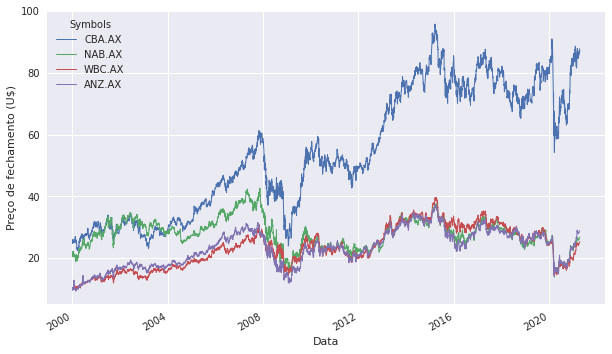

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
close.plot(lw=1, ax=ax)
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (U$)')
plt.show()

In [21]:
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [28]:
close.plot()

In [29]:
returns = close.pct_change()

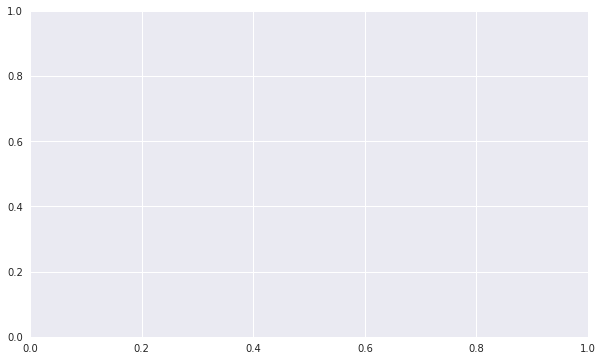

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
returns['CBA.AX'].plot(kind='hist')
plt.show()